# Importing Packages 

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# Data Pre-Processing

In [127]:
dataset = pd.read_csv("/kaggle/input/bank-dataset/UniversalBank.csv")
x = dataset['Age'].values  
y = dataset['CreditCard'].values  

In [128]:
# Train - Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshaping x_train and x_test to make them 2D arrays
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

# Model Fitting

In [129]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [130]:
# Model Prediction
y_pred = classifier.predict(x_test)

# Confusion Matrix Creation

In [131]:
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[702   6]
 [289   3]]


# Visualization of the Training Set

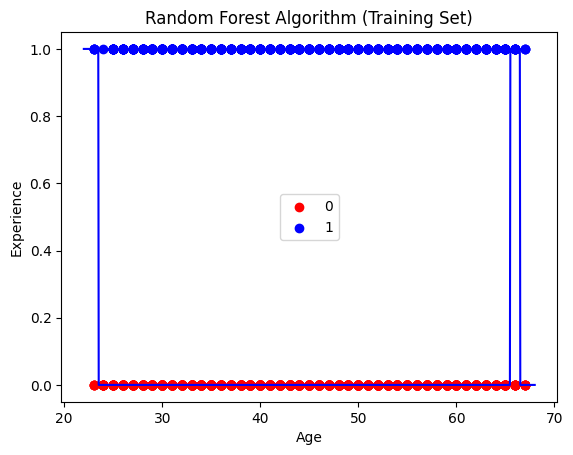

In [132]:
# Generating x values for plotting
x_values = np.linspace(x_train.min() - 1, x_train.max() + 1, 1000).reshape(-1, 1)

# Predicting using the x values
predictions = classifier.predict(x_values)

# Plotting the decision boundary
plt.plot(x_values, predictions, color='blue')

# Plotting the data points
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(x_train[y_train == j], np.full_like(x_train[y_train == j], j),
                color=ListedColormap(('red', 'blue'))(i), label=j)

plt.title("Random Forest Algorithm (Training Set)")
plt.xlabel("Age")
plt.ylabel('Experience')
plt.legend()
plt.show()
